In [61]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [62]:
#plot the example images
def example(digits):
    fig,ax = plt.subplots(8, 8)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i,axi in enumerate(ax.flat):
        axi.set(xticks=[], yticks=[])
        axi.imshow(digits.images[i].reshape(8,8), cmap=plt.cm.binary)
    # label the image with the target value
        axi.text(0, 7, str(digits.target[i]))
    plt.show()

In [66]:
def confus_mat(ytest,ypred):
    mat = confusion_matrix(ytest, ypred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

dict_keys(['target_names', 'target', 'images', 'data', 'DESCR'])


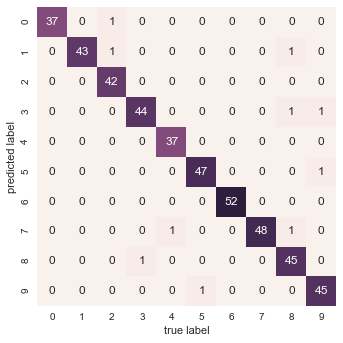

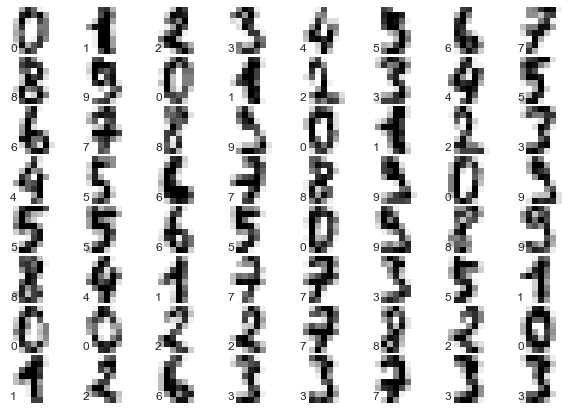

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



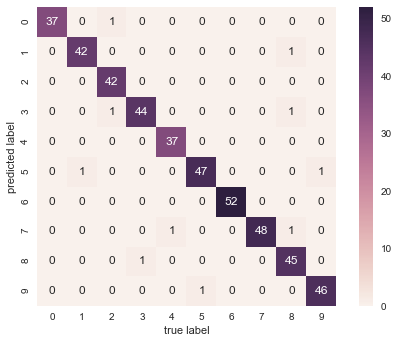

In [67]:
#load the data 
digits = load_digits()
print(digits.keys())
#plot examples
example(digits)
#split the data set 
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
random_state=0)
#select the model
model = RandomForestClassifier(n_estimators=1000)
#train
model.fit(Xtrain, ytrain)
#predict
ypred = model.predict(Xtest)
#evaluate
print(metrics.classification_report(ypred, ytest))
confus_mat(ytest,ypred)